## 1. Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading the dataset.

In [2]:
data = pd.read_csv('../data/dataset.csv')

In [3]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
data = data.drop(['Unnamed: 0', 'flight'], axis=1)

## 3.1 Univariate Analysis

### Histogram

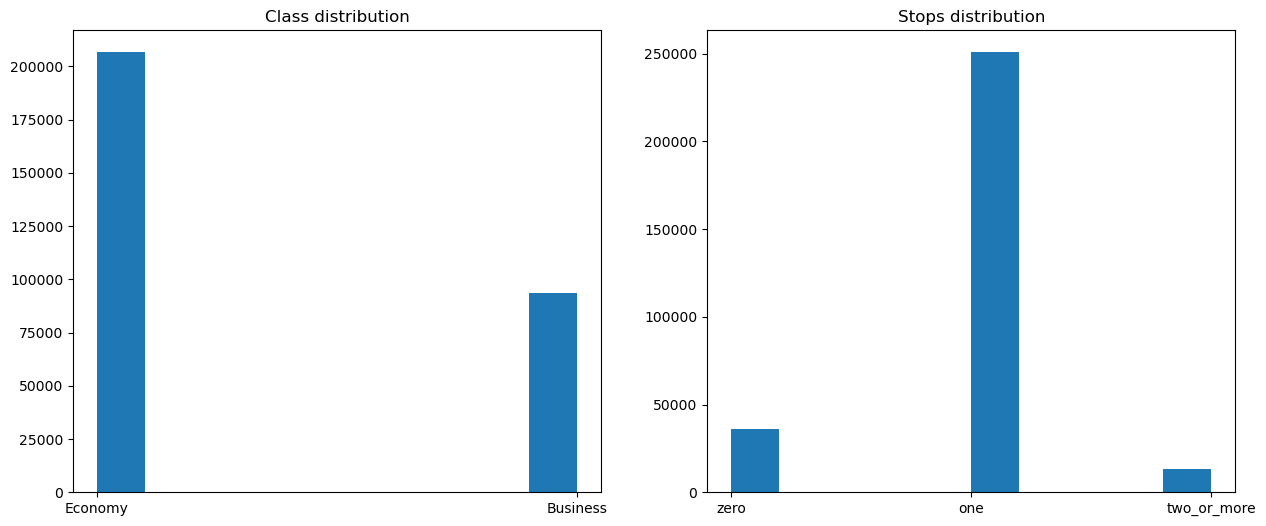

In [5]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.hist(data['class'])
plt.title('Class distribution')

plt.subplot(1, 2, 2)
plt.hist(data['stops'])
plt.title('Stops distribution')

plt.show()

### Pie chart

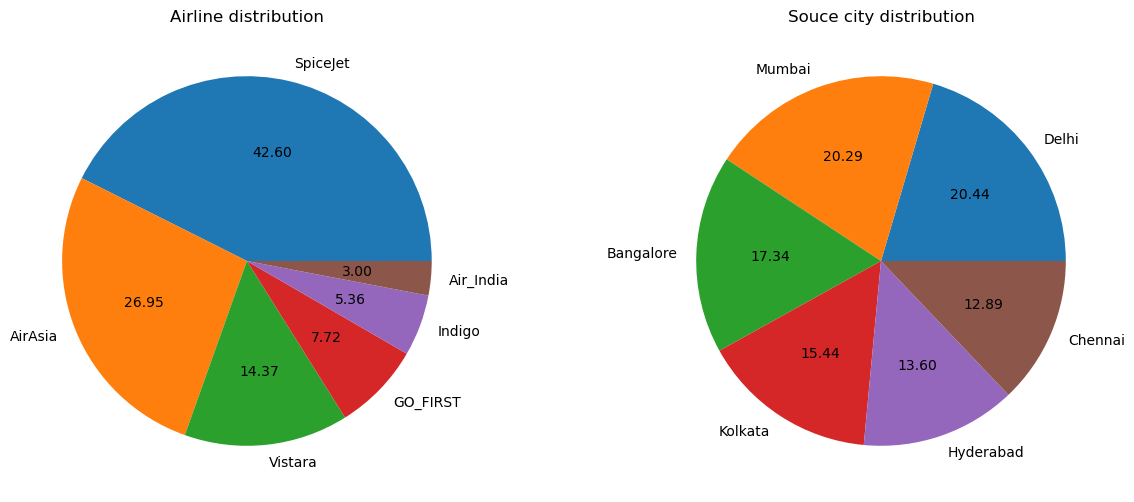

In [6]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.pie(data['airline'].value_counts(),autopct='%.2f', labels = data['airline'].unique())
plt.title('Airline distribution')

plt.subplot(1, 2, 2)
plt.pie(data['source_city'].value_counts(),autopct='%.2f', labels = data['source_city'].unique())
plt.title('Souce city distribution')

plt.show()

### Box plot

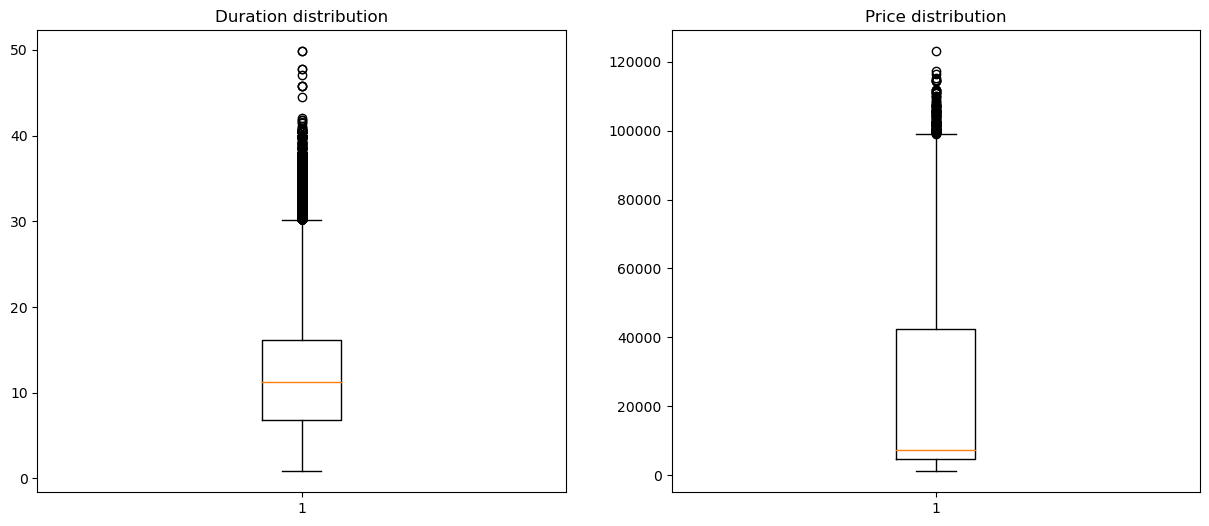

In [7]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.boxplot(data['duration'])
plt.title('Duration distribution')

plt.subplot(1, 2, 2)
plt.boxplot(data['price'])
plt.title('Price distribution')

plt.show()

## 3.2 Bivariate Analysis

### Scatter plot

<Axes: xlabel='duration', ylabel='price'>

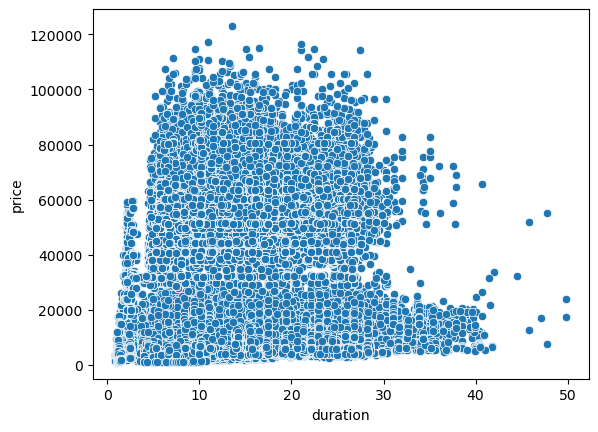

In [8]:
sns.scatterplot(data, x='duration', y='price')

## 3.3 Multi - Variate Analysis

### Heatmap

C:\Users\user\AppData\Local\Temp\ipykernel_3016\3974116545.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hm=data.corr()


<Axes: >

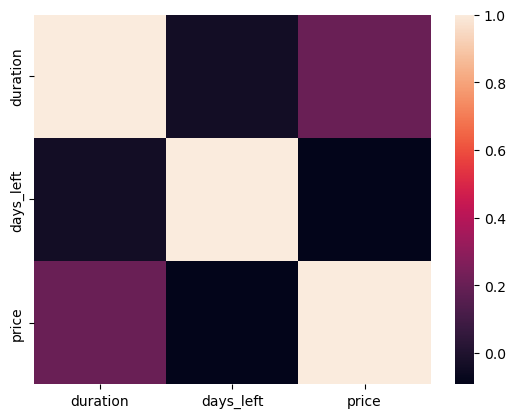

In [9]:
hm=data.corr()
sns.heatmap(hm)

## 4. Performing descriptive statistics on the dataset.

In [10]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


## 5. Checking for Missing values.

In [11]:
data.isnull().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

## 6. Checking for Categorical columns and performing encoding.

In [12]:
# Checking data types of columns
column_types = data.dtypes

# Filtering categorical columns
categorical_columns = column_types[column_types == 'object'].index

# Printing categorical column names
print(categorical_columns)

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class'],
      dtype='object')


### Label encoding

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()

In [15]:
for column in categorical_columns:
    data[column] = le.fit_transform(data[column])

In [16]:
data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955


## 7. Splitting the data into dependent and independent variables.

In [17]:
y = data['price']

y.head()

0    5953
1    5953
2    5956
3    5955
4    5955
Name: price, dtype: int64

In [18]:
X= data.drop(columns=['price'],axis=1)

X.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,4,2,2,2,5,5,1,2.17,1
1,4,2,1,2,4,5,1,2.33,1
2,0,2,1,2,1,5,1,2.17,1
3,5,2,4,2,0,5,1,2.25,1
4,5,2,4,2,4,5,1,2.33,1


## 8. Scaling the independent variables

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_s = scaler.fit_transform(X)

X_s

array([[ 0.48827006, -0.32972125, -0.23789746, ...,  0.67257558,
        -1.39753079, -1.84387477],
       [ 0.48827006, -0.32972125, -0.80793408, ...,  0.67257558,
        -1.3752838 , -1.84387477],
       [-1.69363332, -0.32972125, -0.80793408, ...,  0.67257558,
        -1.39753079, -1.84387477],
       ...,
       [ 1.0337459 , -0.90057609, -0.80793408, ..., -1.48682175,
         0.22371837,  1.69569214],
       [ 1.0337459 , -0.90057609, -0.80793408, ..., -1.48682175,
        -0.30881888,  1.69569214],
       [ 1.0337459 , -0.90057609,  0.90217577, ..., -1.48682175,
        -0.29769538,  1.69569214]])

In [20]:
X = pd.DataFrame(X_s, columns = X.columns)

X.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,0.488270,-0.329721,-0.237897,2.577006,1.105790,1.382425,0.672576,-1.397531,-1.843875
1,0.488270,-0.329721,-0.807934,2.577006,0.531627,1.382425,0.672576,-1.375284,-1.843875
2,-1.693633,-0.329721,-0.807934,2.577006,-1.190865,1.382425,0.672576,-1.397531,-1.843875
3,1.033746,-0.329721,0.902176,2.577006,-1.765028,1.382425,0.672576,-1.386407,-1.843875
4,1.033746,-0.329721,0.902176,2.577006,0.531627,1.382425,0.672576,-1.375284,-1.843875


## 9. Splitting the data into training and testing

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
X_train.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
148417,-1.148157,0.811988,-1.377971,-0.426792,0.531627,-0.910442,0.672576,1.000972,-1.475170
36879,-0.057206,-0.329721,-1.377971,1.075107,1.105790,-0.910442,0.672576,-0.725950,-0.958983
274531,-1.148157,0.811988,-1.377971,-0.426792,-1.765028,-0.910442,-1.486822,1.244299,1.326987
166397,1.033746,0.241134,1.472212,-0.426792,-1.190865,-1.483659,0.672576,-0.274058,-1.106465
272722,1.033746,0.811988,1.472212,-0.426792,1.105790,-0.910442,-1.486822,1.985402,-1.548911


In [24]:
X_test.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
27131,-1.148157,-0.329721,0.902176,-0.426792,-1.190865,0.809208,0.672576,1.046857,1.032023
266857,1.033746,0.811988,0.902176,-0.426792,1.105790,1.382425,-1.486822,-0.332456,1.179505
141228,1.033746,0.811988,0.902176,-0.426792,1.105790,-1.483659,0.672576,-0.239297,1.105764
288329,1.033746,-0.900576,1.472212,-0.426792,0.531627,-0.337225,-1.486822,0.316878,-0.885242
97334,-1.148157,-1.471431,-1.377971,-0.426792,1.105790,1.382425,0.672576,-0.552145,-0.442796


In [25]:
y_train

148417    13524
36879      9940
274531    55983
166397     7927
272722    55502
          ...  
119879    22869
259178    44280
131932     5102
146867     5574
121958     6339
Name: price, Length: 240122, dtype: int64

In [26]:
y_test

27131      7366
266857    64831
141228     6195
288329    60160
97334      6578
          ...  
5234       5026
5591       3001
168314     6734
175191     5082
287693    66465
Name: price, Length: 60031, dtype: int64

## 10. Building the Model

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

## 11. Training the Model

In [29]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## 12. Testing the Model

In [30]:
y_pred = model.predict(X_test)

y_pred

array([ 6519.59, 68375.72,  6195.  , ...,  6663.5 ,  3751.96, 70857.93])

## 14. Measuring the performance using Metrics. 

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [32]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [33]:
print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Error (MAE): ", mae)
print("R-squared (R2) Score: ", r2)

Mean Squared Error (MSE):  7784049.502506673
Mean Absolute Error (MAE):  1093.5350982160537
R-squared (R2) Score:  0.9848994817055204


## 15. Saving the model

In [34]:
import pickle

In [35]:
with open('model.pickle', 'wb') as file:
   pickle.dump(model, file)